In [1]:
import numpy
from numpy import random
#matplotlib inline
import matplotlib.pyplot as plt
## pyplot will let you display your results

In [2]:
sum(numpy.cumsum([1,2,3])<3.4)

2

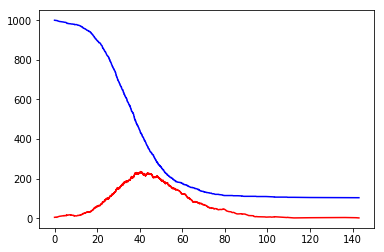

In [144]:
#testing testing lols

##SIS model

Population=1000;
recoveryRate=1/10;
InfectionRate= 1/(Population*4);


NumberOfSteps=1800;

randomNumbers=random.rand(NumberOfSteps)
randomExponentials=random.exponential(1,NumberOfSteps)

currentSteps=0;
currentState= numpy.asarray([Population,5,0]);
PositionArray= numpy.zeros(NumberOfSteps)
InfectedArray= numpy.zeros(NumberOfSteps)
stepsArray=numpy.zeros(NumberOfSteps)
currentTime=0;


ActionMatrix= numpy.asarray([[-1,1,0],[0,-1,1]]);

##Here we have a basic Gillespie style loop.
while currentSteps<NumberOfSteps:
    
    Rates=[currentState[1]*currentState[0]*InfectionRate,recoveryRate*currentState[1]]
    if(sum(Rates)==0):
        break
    stepsArray[currentSteps]=currentTime;
    PositionArray[currentSteps]=currentState[0];
    InfectedArray[currentSteps]=currentState[1];
    currentTime+= randomExponentials[currentSteps]/sum(Rates)
    ActionIndex = sum(randomNumbers[currentSteps]*sum(Rates)>numpy.cumsum(Rates))
    currentState=currentState+ActionMatrix[ActionIndex];
    currentSteps=currentSteps+1;


##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(stepsArray[:(currentSteps-1)],PositionArray[:(currentSteps-1)],'-b')
plt.plot(stepsArray[:(currentSteps-1)],InfectedArray[:(currentSteps-1)],'-r')




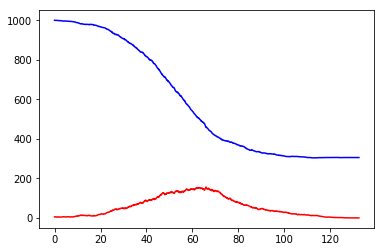

In [130]:
#testing testing lols

##SIS model

Population=1000;
recoveryRate=1/10;
InfectionRate= 1/(Population*6);


NumberOfSteps=1600;

randomNumbers=random.rand(NumberOfSteps)
randomExponentials=random.exponential(1,NumberOfSteps)
randomNormals=random.randn(2,NumberOfSteps)

currentSteps=0;
currentState= numpy.asarray([Population,5,0]);
PositionArray= numpy.zeros(NumberOfSteps)
InfectedArray= numpy.zeros(NumberOfSteps)
stepsArray=numpy.zeros(NumberOfSteps)
currentTime=0;

ActionMatrix= numpy.asarray([[-1,1,0],[0,-1,1]]);

dt=0.1;

while currentSteps<NumberOfSteps:
    
    Rates=[currentState[1]*currentState[0]*InfectionRate,recoveryRate*currentState[1]]
    if((currentState[0]<=0)|(currentState[1]<=0)):
        currentState[0]=0;
        stepsArray[currentSteps]=currentTime;
        PositionArray[currentSteps]=currentState[0];
        InfectedArray[currentSteps]=currentState[1];
        break
    stepsArray[currentSteps]=currentTime;
    PositionArray[currentSteps]=currentState[0];
    InfectedArray[currentSteps]=currentState[1];
    
    currentTime+= dt;
    index=0
    while index<2:
        numberEvents=(randomNormals[index][currentSteps])*numpy.math.sqrt(Rates[index]*dt) +Rates[index]*dt
        currentState= currentState+ActionMatrix[index]*numberEvents;
        index=index+1
    currentSteps+=1


##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(stepsArray[:(currentSteps-1)],PositionArray[:(currentSteps-1)],'-b')
plt.plot(stepsArray[:(currentSteps-1)],InfectedArray[:(currentSteps-1)],'-r')




In [57]:
randomNormals=random.randn(2,NumberOfSteps)
print(randomNormals)

[[ 2.82416494  0.36358113  0.47885088 ...  0.75810799  0.63606778
  -0.95803487]
 [ 0.23967686 -1.40080168 -0.3630813  ... -1.02728909  0.57687217
  -0.56849817]]


So, it turns out that the stochastic SIR model is actually pretty rad, and interesting enough that we COULD just leave the students to experiment with this. The whole Lokta Volterra oscillation thing is probably unnessisarily complicated.